In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%matplotlib inline

In [2]:
N = 100

In [3]:
x1 = np.random.uniform(size=N)

In [4]:
x2 = 0.5*x1 + np.random.normal(size=N)/10

In [5]:
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=N)

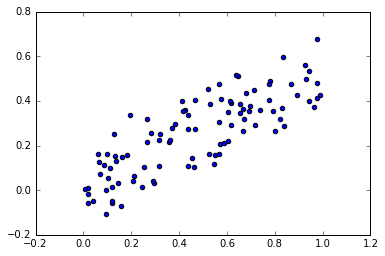

In [6]:
plt.scatter(x1, x2)

In [7]:
X = np.concatenate((np.ones_like(x1)[:,np.newaxis], x1[:,np.newaxis], x2[:,np.newaxis]), axis=1)
X.shape

(100, 3)

In [8]:
def get_estimator(X, Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y[:,np.newaxis])

In [9]:
θ = get_estimator(X, y)
θ # totally wrong

array([[ 1.92166453],
       [ 1.20067956],
       [ 1.49313017]])

In [10]:
θ = get_estimator(X[:,:2], y)
θ # better result

array([[ 1.95483458],
       [ 1.93782823]])

In [11]:
θ = get_estimator(X[:,[0,2]], y)
θ # wrong

array([[ 2.07205688],
       [ 3.12549327]])

In [12]:
X_ = np.append(X, np.array([1, 0.1, 0.8])[np.newaxis,:], axis=0)

In [13]:
y_ = np.append(y, 6)

In [14]:
get_estimator(X_, y_)

array([[ 1.94803965],
       [ 0.47988201],
       [ 2.79232883]])

In [15]:
get_estimator(X_[:,:2], y_)

array([[ 2.07189073],
       [ 1.7695844 ]])

In [16]:
get_estimator(X_[:,[0,2]], y_)

array([[ 2.02554723],
       [ 3.35782703]])

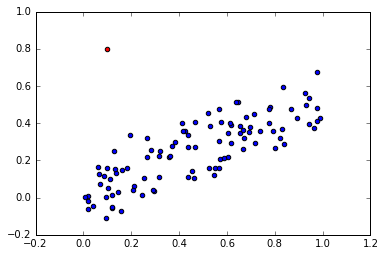

In [17]:
plt.scatter(x1, x2)
plt.scatter([0.1], [0.8], c='r') # high leverage, outlier

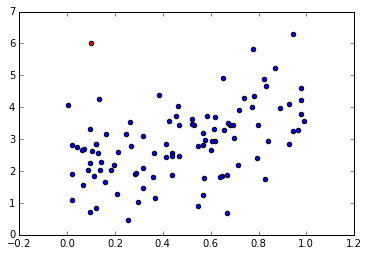

In [18]:
plt.scatter(x1, y)
plt.scatter([0.1], [6], c='r') # outlier

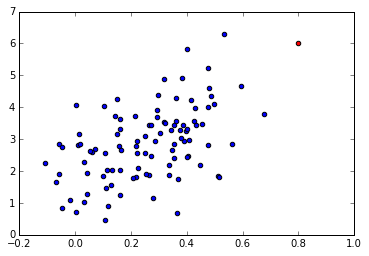

In [19]:
plt.scatter(x2, y)
plt.scatter([0.8], [6], c='r') # high leverage